# California Housing Price Prediction


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
housing = pd.read_csv("d:housing.csv")
housing.head(21) 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


***There are 20640 instances & 'total_bedrooms' has only 20433 non-null values(207 values are missing)

In [4]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


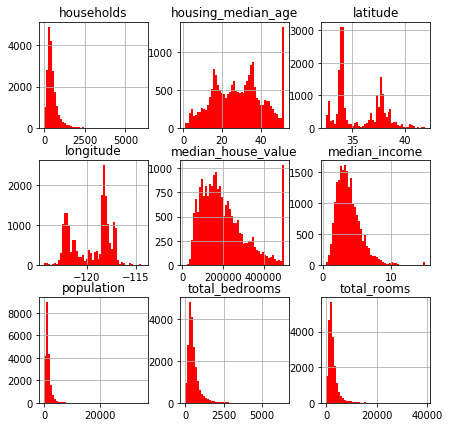

In [6]:
housing.hist(bins=50, figsize=(7,7),color='red')
plt.show()

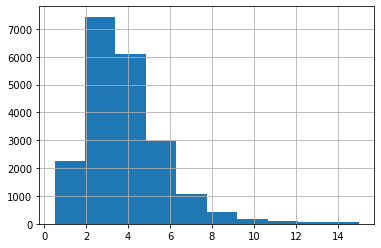

In [7]:
# median_income looks like an important feature

housing["median_income"].hist()

In [8]:
# dividing the income category to limit the number of income category
housing['income_cat']= np.ceil(housing['median_income'] / 1.5)
# putting everything above 5th category as 5th category
housing['income_cat'].where(housing['income_cat']<5, other= 5.0, inplace=True)

In [9]:
housing.head(21) # We Categorised the new feature with using ceil() above on median_income data and split it on dividing it to 1.5

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,3.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,3.0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,3.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,2.0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,3.0


In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=29)

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [11]:
housing['income_cat'].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [12]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

**As seen above the proportions are maintained in the test_set using stratified sampling**


**[Why Stratified?]::*because the features-space is very less and also because its a mid-sized dataset & we don't want to miss out any class

In [13]:
# experimenting : with random sampling now

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=29)

In [14]:
def income_cat_proportions(data):
    return data['income_cat'].value_counts() / len(data)

comparing_props = pd.DataFrame({
    "Overall Props": income_cat_proportions(housing),
    "Random": income_cat_proportions(test_set),
    "Stratified": income_cat_proportions(strat_test_set)
}).sort_index()
comparing_props["random %error"] = 100 * comparing_props["Random"] / comparing_props["Overall Props"] - 100
comparing_props["strat. %error"] = 100 * comparing_props["Stratified"] / comparing_props["Overall Props"] - 100
comparing_props

,Overall Props,Random,Stratified,random %error,strat. %error
1.0,0.039826,0.042636,0.039729,7.055961,-0.243309
2.0,0.318847,0.311531,0.318798,-2.294484,-0.015195
3.0,0.350581,0.344719,0.350533,-1.672195,-0.013820
4.0,0.176308,0.181686,0.176357,3.050289,0.027480
5.0,0.114438,0.119428,0.114583,4.360711,0.127011


In [15]:
for items in (strat_train_set, strat_test_set):
    items.drop("income_cat", axis=1, inplace=True)

In [16]:
housing = strat_train_set.copy()

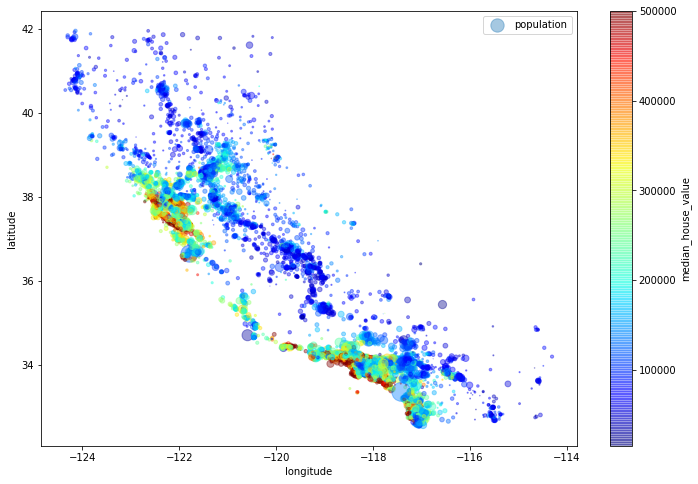

In [17]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha=0.4, 
             s=housing["population"]/100, label="population", figsize=(12,8), 
             c="median_house_value", cmap=plt.get_cmap("jet"), sharex=False)
plt.legend()

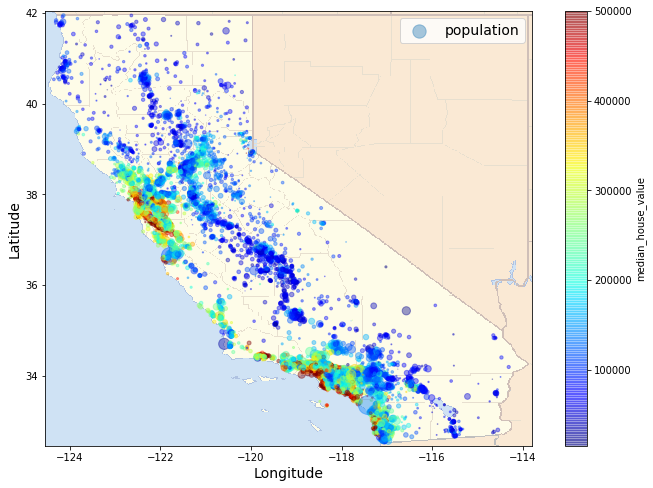

In [18]:
import matplotlib.image as mpimg
ax = housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha=0.4, 
             s=housing["population"]/100, label="population", figsize=(12,8), 
             c="median_house_value", cmap=plt.get_cmap("jet"), sharex=False)
#Load the png image
california_img = mpimg.imread("d:california.png")

plt.imshow(california_img, extent=[-124.55, -113.8, 32.45, 42.05],alpha=0.5, cmap=plt.get_cmap("jet"))

plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)

plt.legend(fontsize=14)
plt.show()

# Looking for Correlation

***(Pearson's Distance Correlation equation)

In [19]:
# Pandas has corr method for calculating correlation
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691071
total_rooms           0.127306
housing_median_age    0.108483
households            0.060084
total_bedrooms        0.043921
population           -0.028341
longitude            -0.043780
latitude             -0.146422
Name: median_house_value, dtype: float64

its always between -1(less correlation) and +1(highly correlated)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E8CEFAE208>,
      dtype=object)

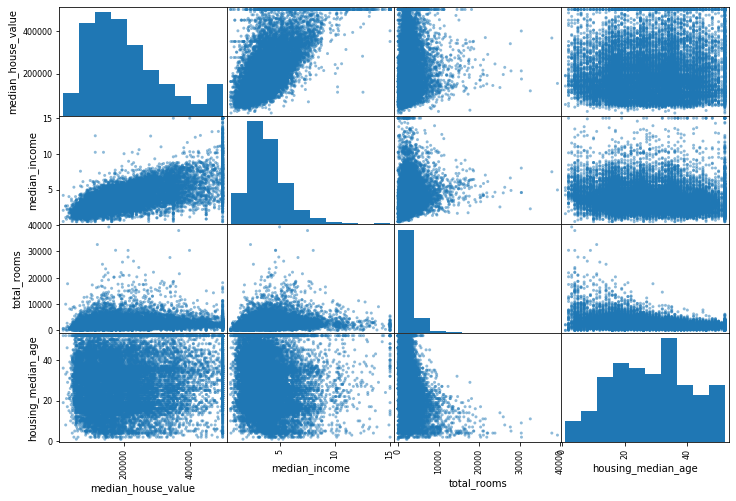

In [20]:
# Other approch is to use the scatter plot in a A vs B fashion

# Problem with this is that (for N features, there will bw N^2 plots)

imp_attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

from pandas.plotting import scatter_matrix

scatter_matrix(housing[imp_attributes], figsize=(12,8))

[0, 16, 0, 550000]

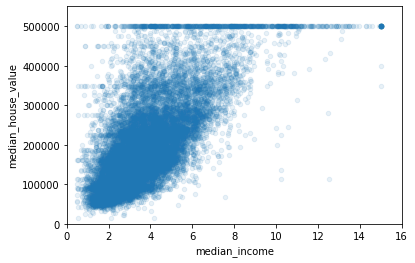

In [21]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1)
plt.axis([0,16,0,550000])

### Feature Engineering


In [22]:
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]= housing["population"]/housing["households"]
housing["rooms_per_household"]= housing["total_rooms"]/housing["households"]

In [23]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.691071
rooms_per_household         0.151804
total_rooms                 0.127306
housing_median_age          0.108483
households                  0.060084
total_bedrooms              0.043921
population_per_household   -0.021688
population                 -0.028341
longitude                  -0.043780
latitude                   -0.146422
bedrooms_per_room          -0.253572
Name: median_house_value, dtype: float64

**[observation]:**the new 'bedroom_per_room' is highly correlated but in a reciprocative way to the 'median_house_value', So
the house with lesser bedrooms/rooms ratio will tends to be more expensive

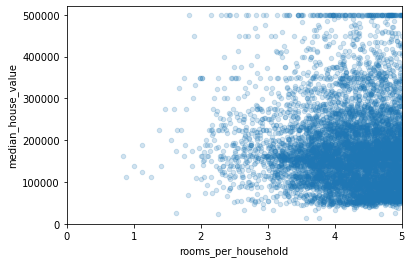

In [24]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value", alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [25]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_room,population_per_household,rooms_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16349.000000,16512.000000,16512.000000,16512.000000,16512.000000,16349.000000,16512.000000,16512.000000
mean,-119.574691,35.642798,28.655220,2622.124879,535.192672,1418.447372,496.865492,3.870355,206418.759872,0.212973,3.103875,5.434516
std,2.005064,2.142773,12.535491,2171.310387,421.124910,1137.484934,382.194550,1.903633,115088.961605,0.058323,11.603193,2.520743
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.100000,0.692308,0.846154
25%,-121.800000,33.930000,18.000000,1446.000000,295.000000,785.000000,279.000000,2.559725,119175.000000,0.175448,2.433980,4.443478
50%,-118.500000,34.260000,29.000000,2123.000000,433.000000,1159.000000,407.000000,3.532750,179650.000000,0.202964,2.817596,5.230221
75%,-118.010000,37.720000,37.000000,3121.250000,641.000000,1715.000000,599.000000,4.739375,264700.000000,0.239351,3.273248,6.056361
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1243.333333,141.909091


# Preparing the data for ML Algorithm

In [26]:
housing = strat_train_set.drop("median_house_value", axis=1)

housing_labels = strat_train_set["median_house_value"].copy()

### Some Data Cleansing

In [27]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 7771 to 20194
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16349 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [28]:
# When calculating imputing value on your own
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5654,-118.30,33.73,42.0,1731.0,433.0,866.0,403.0,2.7451,NEAR OCEAN
14930,-117.02,32.66,19.0,771.0,433.0,376.0,108.0,6.6272,NEAR OCEAN
9814,-121.93,36.62,34.0,2351.0,433.0,1063.0,428.0,3.7250,NEAR OCEAN
14986,-117.03,32.73,34.0,2061.0,433.0,1169.0,400.0,3.5096,NEAR OCEAN
4767,-118.37,34.03,37.0,1236.0,433.0,966.0,292.0,3.0694,<1H OCEAN


In [29]:
# When using Scikit-learn's Imputer class

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy= "median")


In [30]:
housing_num =housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [31]:
# Imputer basically compute across all the attributes, so if you wanna see this across all the attributes,
#    just call statistics_method

imputer.statistics_

array([-118.5    ,   34.26   ,   29.     , 2123.     ,  433.     ,
       1159.     ,  407.     ,    3.53275])

In [32]:
housing_num.median().values

array([-118.5    ,   34.26   ,   29.     , 2123.     ,  433.     ,
       1159.     ,  407.     ,    3.53275])

Using the imputer we created above, transforming the training set by replacing the missing values by the learned medians


In [33]:
X = imputer.transform(housing_num)

In [34]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [35]:
# Cross-check for missing Values

housing_tr[housing_tr.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income


In [36]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-118.09,33.92,35.0,1994.0,419.0,1491.0,428.0,3.7383
1,-122.57,37.96,52.0,3458.0,468.0,1449.0,471.0,9.1834
2,-121.96,36.97,23.0,4324.0,1034.0,1844.0,875.0,3.0777
3,-118.28,34.02,52.0,281.0,103.0,470.0,96.0,1.9375
4,-116.50,33.81,26.0,5032.0,1229.0,3086.0,1183.0,2.5399


## Handling categorical values

In [37]:
housing_cat = housing["ocean_proximity"]
housing_cat.head(10)

7771      <1H OCEAN
9352       NEAR BAY
18657    NEAR OCEAN
4873      <1H OCEAN
12350        INLAND
18621    NEAR OCEAN
15543     <1H OCEAN
14129    NEAR OCEAN
18136     <1H OCEAN
14418    NEAR OCEAN
Name: ocean_proximity, dtype: object

In [38]:
# pandas on factorize() method to convert them into categorical features

housing_cat_encoded, housing_categories = housing_cat.factorize()

In [39]:
housing_cat_encoded[:10]

array([0, 1, 2, 0, 3, 2, 0, 2, 0, 2], dtype=int64)

In [40]:
housing_categories   #this are as 0-> <1H OCEAN, 1-> NEAR OCEAN...etc

Index(['<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN', 'INLAND', 'ISLAND'], dtype='object')

In [41]:
# Using Scikit-learn OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(1, -1))

In [42]:
housing_cat_1hot

<1x16512 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [43]:
# Since 1 hot encoder returns a sparse matrix, need to change it to a dense array
housing_cat_1hot.toarray()

array([[1., 1., 1., ..., 1., 1., 1.]])

### Custom Transformation

In [44]:
from sklearn.base import BaseEstimator, TransformerMixin

# column indexs
rooms_ix, bedrooms_ix, population_ix, household_ix= 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self,add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self         #nothing to do here
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix]/ X[:,household_ix]
        population_per_household = X[:,population_ix]/ X[:,household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [45]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attribs =attr_adder.transform(housing.values)

In [46]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(housing.columns)+["rooms_per_household",
                                                                                           "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-118.09,33.92,35,1994,419,1491,428,3.7383,<1H OCEAN,4.65888,3.48364
1,-122.57,37.96,52,3458,468,1449,471,9.1834,NEAR BAY,7.34183,3.07643
2,-121.96,36.97,23,4324,1034,1844,875,3.0777,NEAR OCEAN,4.94171,2.10743
3,-118.28,34.02,52,281,103,470,96,1.9375,<1H OCEAN,2.92708,4.89583
4,-116.5,33.81,26,5032,1229,3086,1183,2.5399,INLAND,4.25359,2.60862


### Setting up Pipeline for all Pre-processings

In [47]:
from sklearn.pipeline import Pipeline      #To handle missing values
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])      

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[ 0.74049299, -0.80402818,  0.50616062, ..., -0.30771122,
         0.03273077, -0.05512278],
       [-1.49391785,  1.081436  ,  1.86235125, ...,  0.75666902,
        -0.0023651 , -1.17763788],
       [-1.18967887,  0.61940394, -0.45115041, ..., -0.19550447,
        -0.08587951,  0.38012387],
       ...,
       [-1.18967887,  0.79208259,  0.58593654, ..., -0.06328319,
        -0.06658929, -0.48812906],
       [-0.09741107,  0.51673015,  1.22414389, ..., -0.43053438,
         0.07888273,  0.19240118],
       [ 0.17690276, -0.64535051, -1.00958184, ..., -0.32344572,
        -0.05235215,  0.40450624]])

In [48]:
#For handling categorical Transformation
class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self  #do nothing
    def transform(self, X, y=None):
        return X[self.attribute_names].values

In [49]:
#Complete Pipeline

num_attribs = list(housing_num.columns)
cat_attribs = ["ocean_proximity"]

num_pipeline= Pipeline([
    ("selector", DataFrameSelector(num_attribs)),
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("selector", DataFrameSelector(cat_attribs)),
    ("cat_encoder", OneHotEncoder(sparse=False))
])

In [50]:
from sklearn.pipeline import FeatureUnion     # You can club multiple Pipelines to one Biger Pipeline(FeatureUnion)

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline)
])

In [51]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[ 0.74049299, -0.80402818,  0.50616062, ...,  0.        ,
         0.        ,  0.        ],
       [-1.49391785,  1.081436  ,  1.86235125, ...,  0.        ,
         1.        ,  0.        ],
       [-1.18967887,  0.61940394, -0.45115041, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.18967887,  0.79208259,  0.58593654, ...,  0.        ,
         0.        ,  0.        ],
       [-0.09741107,  0.51673015,  1.22414389, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.17690276, -0.64535051, -1.00958184, ...,  0.        ,
         0.        ,  1.        ]])

### Selecting and Training Models 

***1st with LinearRegression***

In [52]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)  # Passing all X and y to our Regression Model_
                                               #So we have our LinearRegression Model fit into the =
                                               #       **California Housing Price Prediction**

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
housing_labels

7771     166200.0
9352     500001.0
18657    263800.0
4873      38800.0
12350     94800.0
           ...   
15219    263700.0
2725      53600.0
17949    254100.0
2104      48300.0
20194    145200.0
Name: median_house_value, Length: 16512, dtype: float64

***So How Can You Predict It***
### You can Predict it on any new Data_Set you Like.

## Let's Try.... Putting in the Machine Learning Algorithm also as part of the Pipeline,
### Let's try a full pipeline on few Training Intences and see how exactly its Predicting and then,may be later we will try fitting in these Pipeline above. NOW we are just experimenting our MachineLearning algorithm.

In [54]:
# trying the full pipeline on a few training instences

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)

In [55]:
print("Prediction : ",lin_reg.predict(some_data_prepared))
print("Actual Labels:", list(some_labels))

Prediction :  [209526.30110297 455497.76141409 252936.22210586 173615.33127943
 114294.56522481]
Actual Labels: [166200.0, 500001.0, 263800.0, 38800.0, 94800.0]


### Here We Getting some error like it predicting 209526.3 US Dollar, Actual it has Price= 166200.0### 

In [56]:
# So Let's Compute the mean_squared_error(How much exactly the error rate is...)

from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_labels, housing_predictions)   # it is just like (y_train and y_predict)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67949.91466225038

## So here we get lots of Root_Mean_Squared_Error##
**Lets Try a Different ALGORITHM then....**   **(DecisionTree)**

In [57]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [58]:
housing_predictions = tree_reg.predict(housing_prepared)

tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse =np.sqrt(tree_mse)
tree_rmse

0.0

# Cross Validation



In [59]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, cv=10, scoring="neg_mean_squared_error")

tree_rmse_scores = np.sqrt(-scores)

###### scoring function is the opposite of mean_squared_error that's why it is negative mean squared error i.e, sqrt(-scores)...

In [60]:
def display_scores(scores):
    print("scores:", scores)
    print("mean:", scores.mean())
    print("std deviation:", scores.std())
    
display_scores(tree_rmse_scores)

scores: [70042.93416921 69105.94872336 67464.13592885 71334.85184585
 68467.68745441 67394.55655933 71818.38473276 70966.01580044
 67000.18087279 70845.36459247]
mean: 69444.00606794786
std deviation: 1703.2879220553825


In [61]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, cv=10, scoring="neg_mean_squared_error")

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

scores: [67641.22210761 69245.155892   65690.83401976 67581.651926
 66586.04760743 66937.30771561 67397.33645629 69807.64170261
 66660.63451034 74883.89423608]
mean: 68243.17261737354
std deviation: 2500.726216291982


## Again we get little bit GOOD model from above DecisionTree Alforithm as compare to linear Regression

***Now Again we need the Best Model so again with the new Random_Forest_Regression Algorithm***

In [62]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=29)
forest_reg.fit(housing_prepared, housing_labels)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=29, verbose=0, warm_start=False)

In [63]:
housing_pred = forest_reg.predict(housing_prepared)

forest_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, cv=10, scoring="neg_mean_squared_error")

forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

scores: [67641.22210761 69245.155892   65690.83401976 67581.651926
 66586.04760743 66937.30771561 67397.33645629 69807.64170261
 66660.63451034 74883.89423608]
mean: 68243.17261737354
std deviation: 2500.726216291982


## Fine Tuning Model:


In [64]:
from sklearn.model_selection import GridSearchCV

param_grid =[
    {'n_estimators':[3, 10, 30], 'max_features':[2, 4, 6, 8]},
    {'bootstrap':[False], 'n_estimators':[3, 10], 'max_features':[2, 3, 4]}
]

rf_reg = RandomForestRegressor()

grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring="neg_mean_squared_error")

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [65]:
# to get the best combinations of hyperparameters
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [66]:
# to get the best estimators directly
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [67]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
# we prepare the data
X_test_prepared = full_pipeline.transform(X_test)

In [68]:
# do the prediction
final_predictions = final_model.predict(X_test_prepared)
# find mean square error
final_mse = mean_squared_error(y_test, final_predictions)
# find root mean square error
final_rmse = np.sqrt(final_mse)
final_rmse

51070.26109480527

In [69]:
# if now you want to know the error now you can do with....

cv_res = grid_search.cv_results_

for mean_score, params in zip(cv_res["mean_test_score"],cv_res["params"]):   #so zip function basically clubs together the
                                                                                # list values as Dictionary...
        print(np.sqrt(-mean_score), params)
    

64466.398971055896 {'max_features': 2, 'n_estimators': 3}
54273.25292668392 {'max_features': 2, 'n_estimators': 10}
51984.22395271258 {'max_features': 2, 'n_estimators': 30}
59573.175561182456 {'max_features': 4, 'n_estimators': 3}
51932.735842384565 {'max_features': 4, 'n_estimators': 10}
49580.085469010235 {'max_features': 4, 'n_estimators': 30}
58445.867397344235 {'max_features': 6, 'n_estimators': 3}
51278.43153935092 {'max_features': 6, 'n_estimators': 10}
49369.62885781061 {'max_features': 6, 'n_estimators': 30}
57561.31919226069 {'max_features': 8, 'n_estimators': 3}
51274.57014386331 {'max_features': 8, 'n_estimators': 10}
49550.52226933056 {'max_features': 8, 'n_estimators': 30}
60725.16391243041 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53464.768910369516 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58331.47473129348 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51420.22474406058 {'bootstrap': False, 'max_features': 3, 'n_estimator

In [70]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.169175,0.016544,0.006838,0.001428,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.915348e+09,-4.207705e+09,-4.420392e+09,-4.175636e+09,-4.060502e+09,-4.155917e+09,1.673295e+08,18
1,0.523295,0.009433,0.022009,0.000875,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.941063e+09,-2.881397e+09,-2.907048e+09,-2.919036e+09,-3.079386e+09,-2.945586e+09,6.961771e+07,11
2,1.643484,0.086870,0.048879,0.011027,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.672342e+09,-2.615723e+09,-2.661547e+09,-2.680307e+09,-2.881879e+09,-2.702360e+09,9.250549e+07,9
3,0.227795,0.025389,0.008966,0.003067,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.719127e+09,-3.498399e+09,-3.755271e+09,-3.218360e+09,-3.553660e+09,-3.548963e+09,1.915181e+08,16
4,0.877824,0.115376,0.025689,0.005846,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.766399e+09,-2.663307e+09,-2.667805e+09,-2.735100e+09,-2.652434e+09,-2.697009e+09,4.525850e+07,8
5,2.471181,0.164155,0.057627,0.010347,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.464042e+09,-2.301799e+09,-2.484081e+09,-2.431297e+09,-2.609706e+09,-2.458185e+09,9.883633e+07,3
6,0.408396,0.051937,0.008338,0.002095,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.303768e+09,-3.429817e+09,-3.365693e+09,-3.573444e+09,-3.406876e+09,-3.415919e+09,8.965436e+07,15
7,1.461957,0.227101,0.026950,0.004766,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.573137e+09,-2.436359e+09,-2.694830e+09,-2.700468e+09,-2.742593e+09,-2.629478e+09,1.118703e+08,6
8,4.775155,0.418526,0.103466,0.028388,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.441128e+09,-2.329071e+09,-2.491728e+09,-2.368731e+09,-2.556143e+09,-2.437360e+09,8.187267e+07,1
9,0.626478,0.144500,0.011846,0.004279,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.218627e+09,-3.000745e+09,-3.419332e+09,-3.417179e+09,-3.510645e+09,-3.313305e+09,1.831024e+08,12


# End of Our Project #
***Thanking You All***